In [1]:
from deepforest import main
from deepforest import get_data
import cv2 as cv
import matplotlib.pyplot as plt

### Load Model

In [2]:
model = main.deepforest()
model.use_release()

Reading config file: /usr/local/lib/python3.8/site-packages/deepforest/data/deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


### Load Image and Predict

In [3]:
img_name = 'OSBS_029.png'
image_path = get_data(img_name)
image = cv.imread(image_path, 3)

In [4]:
pred_boxes = model.predict_image(path=image_path, return_plot=False)
pred_boxes.head()

/usr/local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


,xmin,ymin,xmax,ymax,label,score
0,330.0,342.0,373.0,391.0,Tree,0.802979
1,216.0,206.0,248.0,242.0,Tree,0.778803
2,325.0,44.0,363.0,82.0,Tree,0.751573
3,261.0,238.0,296.0,276.0,Tree,0.748605
4,173.0,0.0,229.0,33.0,Tree,0.738210


In [5]:
def plot_bboxes(img, boxes):
    """
    Plot the bounding boxes of a prediction
    :param img: {array-like}, shape = [x, y, c]
    :param boxes: {array-like}, shape = [n, 4]
    :return: void
    """
    for coords in boxes:
        p1 = (int(coords[0]), int(coords[1]))
        p2 = (int(coords[2]), int(coords[3]))
        cv.rectangle(img, p1, p2, (0, 255, 0), 1)

    plt.imshow(img[:, :, ::-1])

In [6]:
boxes_coords = pred_boxes.loc[:, 'xmin':'ymax'].values

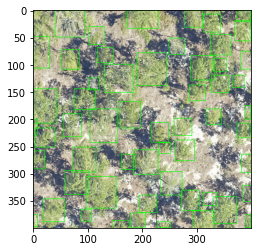

In [7]:
plot_bboxes(image, boxes_coords)